In [2]:
# !pip install missingno

#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline



In [4]:
#read the CSV file
missingdf = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)


In [5]:
#we remove missings first. Let's see how many missings we have
missingdf.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

<Axes: >

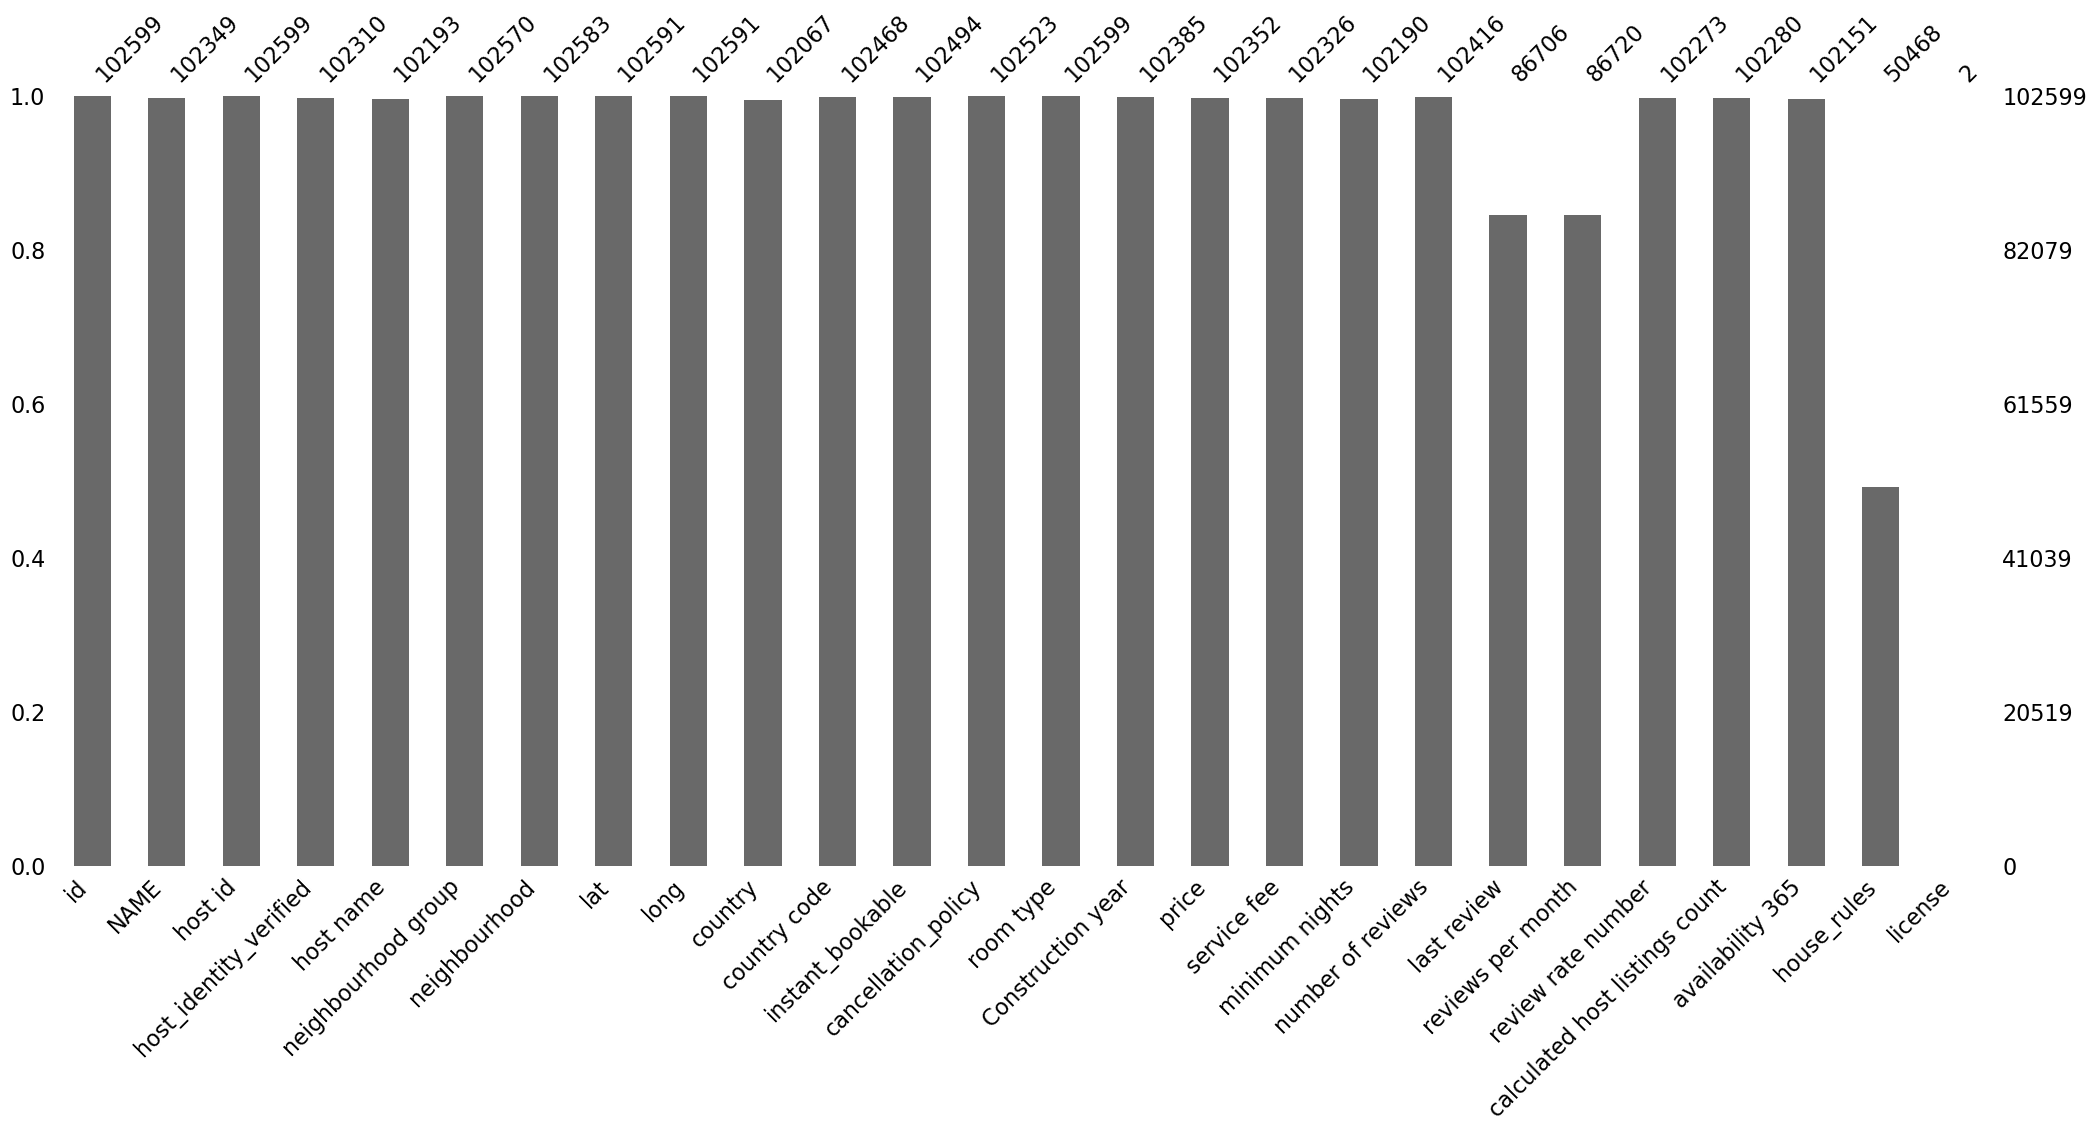

In [6]:
#see the completeness of the data using mano.bar
mano.bar(missingdf)

In [7]:
missingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
missingdf.shape

(102599, 26)

<Axes: >

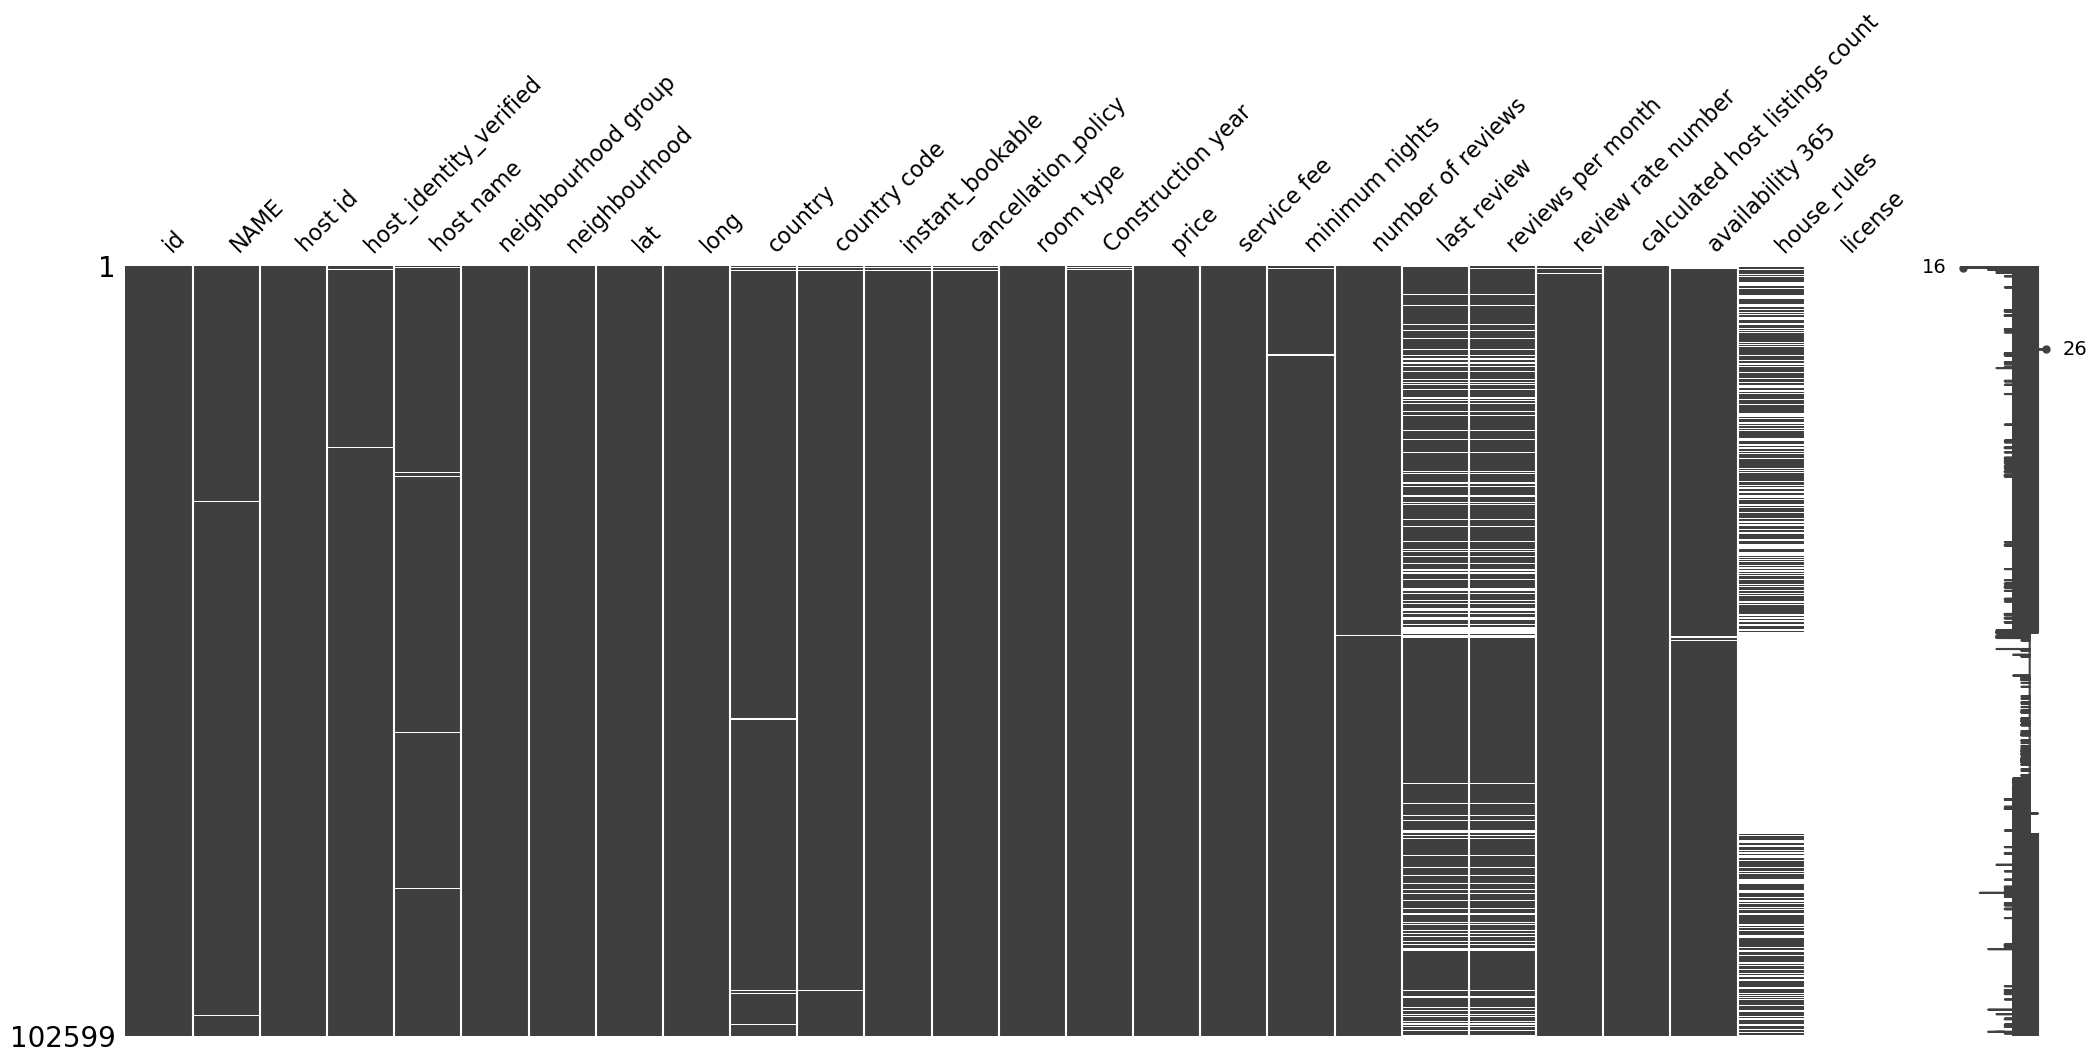

In [9]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(missingdf)

## removing license column as it is almost empty:

In [10]:
#dropping license column
missingdf = missingdf.drop('license', axis=1)

In [11]:
missingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [12]:
# Remove rows with all missing values (empty rows)
missingdf = missingdf.dropna(how='all')

In [13]:
missingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [14]:
missingdf.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131


In [16]:
#let's impute the missing 'house_rules' column with the word 'blank'

missingdf.loc[missingdf.house_rules.isnull(), 'house_rules'] = 'blank'

In [17]:
missingdf.isnull().sum()

id                                    0
NAME                                250
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                           0


In [18]:
# Let's check the column 'last review'

missingdf['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last review, Length: 102599, dtype: object

In [20]:
#last review is a date column

missingdf['last review'] = pd.to_datetime(missingdf['last review'])

In [21]:
#checking min and max values in last review

missingdf['last review'].min(), missingdf['last review'].max()

(Timestamp('2012-07-11 00:00:00'), Timestamp('2058-06-16 00:00:00'))

In [22]:
#lets fix dates greater than 2022

missingdf[missingdf['last review'].apply(lambda x: x.year) > 2022]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
127,1071478,Garden studio in the Upper East Sid,77172555024,unconfirmed,Miller,Manhattan,Upper East Side,40.77800,-73.94822,United States,...,$571,$114,5.0,21.0,2024-08-15,0.19,4.0,NaN,395.0,"Dear Guests, Welcome to 62 Cornwall St! I hope..."
191,1106825,LUX APT IN TIMES SQUARE NEW BUILDING,93725364475,unconfirmed,Aiden,Manhattan,Hell's Kitchen,40.76307,-73.99665,United States,...,$539,$108,NaN,41.0,2025-06-26,0.38,2.0,1.0,NaN,"You will be sharing a bathroom, so you must be..."
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,United States,...,$842,$168,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0,No rules per say. I just ask that you respect ...
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,United States,...,$920,$184,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0,Check-In is 3pm. Check-Out is 12 Noon. In or...
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,United States,...,$721,$144,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0,blank


In [23]:
#let's change these wrong review dates to the median review date, giving benefit of doubt to the host

missingdf.loc[missingdf[missingdf['last review'].apply(lambda x: x.year) > 2022].index, 'last review'] = missingdf['last review'].median()

In [24]:
#imputing null values to minimum date

missingdf.loc[missingdf['last review'].isnull(), 'last review'] = missingdf['last review'].median()

In [25]:
#finding duplicates

missingdf[missingdf.duplicated()]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$706,$141,1.0,1.0,2021-11-14,0.27,3.0,1.0,339.0,blank
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$651,$130,3.0,38.0,2021-11-13,0.27,3.0,1.0,0.0,blank
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$907,$181,3.0,10.0,2021-11-13,0.08,3.0,30.0,32.0,blank
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$589,$118,30.0,38.0,2021-11-13,0.34,5.0,2.0,324.0,blank
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$356,$71,30.0,13.0,2021-11-13,0.14,4.0,28.0,336.0,blank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$844,$169,1.0,0.0,2019-06-14,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$988,$198,3.0,0.0,2019-06-14,NaN,5.0,1.0,342.0,blank
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,blank


In [26]:
#removing duplicates

missingdf.drop_duplicates(keep='first', inplace=True)

In [27]:
#there could be some more duplicates where latitude, longitude, host name, and price are same

missingdf.duplicated(subset=['host name', 'lat', 'long', 'price']).sum()

32753

In [28]:
#dropping all duplicates
missingdf.drop_duplicates(subset=['host name', 'lat', 'long', 'price'], inplace=True)
missingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69305 entries, 0 to 102050
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              69305 non-null  int64         
 1   NAME                            69097 non-null  object        
 2   host id                         69305 non-null  int64         
 3   host_identity_verified          69088 non-null  object        
 4   host name                       68992 non-null  object        
 5   neighbourhood group             69276 non-null  object        
 6   neighbourhood                   69289 non-null  object        
 7   lat                             69297 non-null  float64       
 8   long                            69297 non-null  float64       
 9   country                         68982 non-null  object        
 10  country code                    69219 non-null  object        
 11  instan

In [29]:
missingdf.isnull().sum()

id                                    0
NAME                                208
host id                               0
host_identity_verified              217
host name                           313
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             323
country code                         86
instant_bookable                     86
cancellation_policy                  57
room type                             0
Construction year                   190
price                               245
service fee                         241
minimum nights                      363
number of reviews                   152
last review                           0
reviews per month                 10814
review rate number                  239
calculated host listings count      144
availability 365                    438
house_rules                           0


In [30]:
#using median to fill missing values in reviews per month column

missingdf.loc[missingdf['reviews per month'].isnull(), 'reviews per month'] = 0.79

In [32]:
#using "blank" to fill missing values in names column
missingdf.loc[missingdf['NAME'].isnull(), 'NAME'] = 'blank'

In [33]:
#filling missing values in id column with 0
missingdf.loc[missingdf['host id'].isnull(), 'host id'] = 0 

In [34]:
#filling missing values in host_identity_verified column with 'unconfirmed'
missingdf.loc[missingdf['host_identity_verified'].isnull(), 'host_identity_verified'] = 'unconfirmed'

In [35]:
#filling missing values in host name column with 'blank'
missingdf.loc[missingdf['host name'].isnull(), 'host name'] = 'blank'


In [36]:
#drop 'country' and 'country code' because they have zero variability
missingdf.drop(['country', 'country code'], axis=1, inplace=True)

In [48]:
#filling missing values in neighbourhood column using latitudes and longitudes

!pip install geopy



  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB ? eta -:--:--
   ---------------------------- ---------- 92.2/125.4 kB 521.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 521.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 521.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 521

In [49]:
import gc


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")

def loc_from_coord(lat, long):
    location = geolocator.reverse(str(lat)+","+str(long))
    return location.raw['address'].get('road', '')

idx = missingdf.loc[missingdf.neighbourhood.isnull()].index
missingdf.loc[idx, 'neighbourhood'] = missingdf.loc[idx].apply(lambda x: \
                                                loc_from_coord(x.lat, x.long), axis=1)


In [51]:
#filling missing values in neighbourhood group using similar method

def neigh_from_coord(lat,long):
    location = geolocator.reverse(str(lat)+","+str(long))
    return location.raw['address'].get('suburb', '')

idx = missingdf.loc[missingdf['neighbourhood group'].isnull()].index
missingdf.loc[idx, 'neighbourhood group'] = missingdf.loc[idx].apply(lambda x: neigh_from_coord(x.lat, x.long), axis=1)


In [52]:
missingdf.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 8
long                                8
instant_bookable                   86
cancellation_policy                57
room type                           0
Construction year                 190
price                             245
service fee                       241
minimum nights                    363
number of reviews                 152
last review                         0
reviews per month                   0
review rate number                239
calculated host listings count    144
availability 365                  438
house_rules                         0
dtype: int64

In [53]:
#filling missing values of lat and long using already present data for the same neighbourhood
idx = missingdf.loc[missingdf.lat.isnull()].index

# Now we define a function to accept the location and return latitude and longitude
def lat_from_loc(loc):
    location = geolocator.geocode(loc)
    return location.latitude

def long_from_loc(loc):
    location = geolocator.geocode(loc)
    return location.longitude

missingdf.loc[idx, 'lat'] = missingdf.loc[idx].apply(lambda x: lat_from_loc(x.neighbourhood+', '+x['neighbourhood group']), axis=1)
missingdf.loc[idx, 'long'] = missingdf.loc[idx].apply(lambda x: long_from_loc(x.neighbourhood+', '+x['neighbourhood group']), axis=1)

In [54]:
missingdf.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                   86
cancellation_policy                57
room type                           0
Construction year                 190
price                             245
service fee                       241
minimum nights                    363
number of reviews                 152
last review                         0
reviews per month                   0
review rate number                239
calculated host listings count    144
availability 365                  438
house_rules                         0
dtype: int64

In [55]:
#filling missing values in availability 365 with median value 127
missingdf['availability 365'] = missingdf['availability 365'].fillna(127)

In [56]:
#filling missing values in min nights with median 3
missingdf['minimum nights'] = missingdf['minimum nights'].fillna(3)

In [57]:
missingdf.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                   86
cancellation_policy                57
room type                           0
Construction year                 190
price                             245
service fee                       241
minimum nights                      0
number of reviews                 152
last review                         0
reviews per month                   0
review rate number                239
calculated host listings count    144
availability 365                    0
house_rules                         0
dtype: int64

In [60]:
#converting price column from object to float
import re

idx = missingdf.loc[~missingdf.price.isnull()].index
missingdf.loc[idx, 'price'] = missingdf.loc[idx].apply(lambda x: re.sub(r'\D', '', x.price), axis=1)
missingdf.loc[idx, 'price'] = pd.to_numeric(missingdf['price'])

In [61]:
#filling missing values in price column with mean

missingdf.price.fillna(missingdf.price.mean(), inplace=True)


In [62]:
#converting service fee column from object to float

idx = missingdf.loc[~missingdf['service fee'].isnull()].index
missingdf.loc[idx, 'service fee'] = missingdf.loc[idx].apply(lambda x: re.sub(r'\D', '', x['service fee']), axis=1)
missingdf.loc[idx, 'service fee'] = pd.to_numeric(missingdf['service fee'])

In [63]:
#filling missing values in service fee column with mean

missingdf['service fee'].fillna(missingdf['service fee'].mean(), inplace=True)

In [64]:
missingdf.isnull().sum()

id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
instant_bookable                   86
cancellation_policy                57
room type                           0
Construction year                 190
price                               0
service fee                         0
minimum nights                      0
number of reviews                 152
last review                         0
reviews per month                   0
review rate number                239
calculated host listings count    144
availability 365                    0
house_rules                         0
dtype: int64

In [65]:
#filling missing values with median in respective columns

missingdf['review rate number'].fillna(missingdf['review rate number'].median(), inplace=True)
missingdf['Construction year'].fillna(missingdf['Construction year'].median(), inplace=True)
missingdf['number of reviews'].fillna(missingdf['number of reviews'].median(), inplace=True)
missingdf['calculated host listings count'].fillna(missingdf['calculated host listings count'].median(), inplace=True)


In [66]:
missingdf.isnull().sum()

id                                 0
NAME                               0
host id                            0
host_identity_verified             0
host name                          0
neighbourhood group                0
neighbourhood                      0
lat                                0
long                               0
instant_bookable                  86
cancellation_policy               57
room type                          0
Construction year                  0
price                              0
service fee                        0
minimum nights                     0
number of reviews                  0
last review                        0
reviews per month                  0
review rate number                 0
calculated host listings count     0
availability 365                   0
house_rules                        0
dtype: int64

In [67]:
#filling missing values in instant bookable column with "true"
missingdf.instant_bookable.fillna(True, inplace=True)

#filling missing values in cancellation policy column with "moderate"
missingdf.cancellation_policy.fillna('moderate', inplace=True)


In [68]:
missingdf.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
dtype: int64

In [70]:
# Fix the spellings of manhattan and brooklyn in column 'neighbourhood group'
missingdf.loc[missingdf['neighbourhood group']=='manhatan', 'neighbourhood group'] = 'Manhattan'
missingdf.loc[missingdf['neighbourhood group']=='brookln', 'neighbourhood group'] = 'Brooklyn'

In [71]:
# Output the clean dataset
clean_file_path = "clean_airbnb_data.csv"
missingdf.to_csv(clean_file_path, index=False)

# Print a message indicating the file path where the clean dataset is saved
print("Clean dataset saved to:", clean_file_path)

Clean dataset saved to: clean_airbnb_data.csv
